<img src="img/CSK_banner.PNG" alt="banner">
# A (Brief) Introduction to Data Science
**CSK 2020**

Welcome to the wild world of data science! This is a notebook designed for UC Berkeley's CS Kickstart program, specifically . Feel free to read through this lab and interact with the content.

## Table of Contents
- The Jupyter Notebook
- "The Data Science Life Cycle"
- Data Analysis 
- Hypothesis and Predictions
- Next Steps


# 0: The Jupyter Notebook
[Jupyter Notebook](https://jupyter.org/) is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. The file that we are on now is a jupyter notebook, and it's used fairly extensively in the data science industry. It consists of a series of cells that you can run in real time.

Here's a quick rundown on how to use this notebook.

## 0.1 Cells
This notebook is made out of a series of cells. A cell is a multiline text input field, and its contents can be executed by using Shift-Enter, or by clicking either the “Play” button (▶|) in the toolbar, or Cell, Run in the menu bar. 

There are three types of cells:
- code cells
- markdown cells
- raw cells

You don't need to worry about the last type of cell; we'll be dealing with the first two today.
### 0.1.1 Code Cells
Code cells are cells where we can write and run code in python. Here's an example of a code cell, see if you can run it by pressing Shift-Enter (or Cell->Run in the menu)


In [1]:
print('hello world')

hello world


If you ran the cell correctly, the notebook should output the words "hello world". Pretty neat huh?

### 0.1.1 Markdown Cells
Markdown cells are cells like this one where we can write text and have it display in the notebook. In this notebook the only time you'll have to edit these types of cells will be in some free response answers like the one below. Edit the following cell and run it to see the text!

**Question 0.1** What's your name and favorite food?

*YOUR ANSWER HERE*

# 1."The Data Science Life Cycle"

The first thing we can ask ourselves about this question is "what exactly *is* data science in the first place?"

The [data8 textbook](https://www.inferentialthinking.com/chapters/01/1/intro.html) says the following about data science.
> Data Science is about drawing useful conclusions from large and diverse data sets through exploration, prediction, and inference. Exploration involves identifying patterns in information. Prediction involves using information we know to make informed guesses about values we wish we knew. Inference involves quantifying our degree of certainty: will the patterns that we found in our data also appear in new observations?

Hopefully we can continue to develop this definition during today's lab, starting off with a concept called the "data science life cycle."

## 1.1 The Life Cycle, deconstructed
The steps to the cycle are as follows: 
1. Formulating a question or problem
2. Acquiring and cleaning data
3. Conducting exploratory data analysis
4. Using prediction and inference to draw conclusions


In [38]:
from datascience import *
import pandas as pd
import matplotlib
%matplotlib inline

In [5]:
## cleaning data real quick  

by_maj = Table.read_table('data/by_major.csv')
#bm = pd.read_csv('data/by_major.csv')
by_min = Table.read_table('data/by_minors.csv')
gender_ethnicity = Table.read_table('data/level_gender_ethnicity.csv')
STEM_all = Table.read_table('data/STEM_collegewide.csv')
STEM_major = Table.read_table('data/STEM_majors.csv')
STEM_pipeline = Table.read_table('data/STEM_pipeline.csv')
student_maj = Table.read_table('data/student_majors.csv')

In [6]:
stem_gender = by_maj.select(['STEM Flag', 'Gender'])
stem_gender.group('STEM Flag')

STEM Flag,count
0,8826
1,9199


In [7]:
t = stem_gender.where('STEM Flag', 0).group('Gender')

In [8]:
t.bar('Gender', 'count')

In [9]:
gender_ethnicity

Academic Yr,Degree Level Desc,Person Gender Desc,Ucb Level1 Ethnic Rollup Desc,Headcount
2011-12,Bachelor,Female,Asian/Pacific Islander,1524
2011-12,Bachelor,Female,International,254
2011-12,Bachelor,Female,Underrepresented Minority,656
2011-12,Bachelor,Female,White/Other,1452
2011-12,Bachelor,Male,Asian/Pacific Islander,1310
2011-12,Bachelor,Male,International,280
2011-12,Bachelor,Male,Underrepresented Minority,447
2011-12,Bachelor,Male,White/Other,1390
2011-12,Doctoral,Female,Asian/Pacific Islander,61
2011-12,Doctoral,Female,International,62


In [10]:
STEM_all

Year,Institution,Type,Gender,CIP Fld,Degree Count
2016-17,Harvard,Private,Female,Archeology,5
2016-17,Harvard,Private,Female,Behavioral Sciences,11
2016-17,Harvard,Private,Female,Biological and Biomedical Sciences,164
2016-17,Harvard,Private,Female,Cognitive Psychology and Psycholinguistics,0
2016-17,Harvard,Private,Female,Computer Science,65
2016-17,Harvard,Private,Female,Engineering,26
2016-17,Harvard,Private,Female,Environmental Studies,14
2016-17,Harvard,Private,Female,Experimental Psychology,87
2016-17,Harvard,Private,Female,Mathematics and Statistics,78
2016-17,Harvard,Private,Female,Natural Sciences,10


In [11]:
STEM_major

Semester,STEM Flg,CIP Field,Gender,Ethnicity,Headcount
Spring 2020,Not STEM,Not STEM,All Other Students,Asian/Pacific Islander,547
Spring 2020,Not STEM,Not STEM,All Other Students,International,200
Spring 2020,Not STEM,Not STEM,All Other Students,Underrepresented Minority,707
Spring 2020,Not STEM,Not STEM,All Other Students,White/Other,827
Spring 2020,Not STEM,Not STEM,Female,Asian/Pacific Islander,"1,201"
Spring 2020,Not STEM,Not STEM,Female,International,296
Spring 2020,Not STEM,Not STEM,Female,Underrepresented Minority,"1,419"
Spring 2020,Not STEM,Not STEM,Female,White/Other,"1,386"
Spring 2020,STEM,Biological And Biomedical Sciences,All Other Students,Asian/Pacific Islander,343
Spring 2020,STEM,Biological And Biomedical Sciences,All Other Students,International,37


In [12]:
STEM_pipeline

Timepoint,STEM Flg,Applicant Type,Gender,Ethnicity,Headcount
Admitted,Not STEM,Freshman Entrant,All Other Students,Asian/Pacific Islander,"7,391"
Admitted,Not STEM,Freshman Entrant,All Other Students,International,"2,207"
Admitted,Not STEM,Freshman Entrant,All Other Students,Underrepresented Minority,"4,433"
Admitted,Not STEM,Freshman Entrant,All Other Students,White/Other,"9,147"
Admitted,Not STEM,Freshman Entrant,Female,Asian/Pacific Islander,"12,700"
Admitted,Not STEM,Freshman Entrant,Female,International,"3,333"
Admitted,Not STEM,Freshman Entrant,Female,Underrepresented Minority,"8,718"
Admitted,Not STEM,Freshman Entrant,Female,White/Other,"12,933"
Admitted,Not STEM,Transfer Entrant,All Other Students,Asian/Pacific Islander,"1,961"
Admitted,Not STEM,Transfer Entrant,All Other Students,International,"1,090"


In [13]:
student_maj

Academic Yr,Ungrad Grad Cd,Term/Year,Term Period,College/School,Division,Department,Major,Gender,Ethnicity,Headcount,Prorated Headcount,Number of Records,Entry Status Desc,MajorShort,STEM Flag,Residency Status Desc,Residency Fee Cd
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,Asian/Pacific Islander,10,10,1,Graduate,Chem Eng,STEM,CA Resident,CA Resident
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,Asian/Pacific Islander,7,7,1,Graduate,Chem Eng,STEM,Out-of-State Domestic,Out-of-State Domestic
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,International,18,18,1,Graduate,Chem Eng,STEM,International,International
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,Underrepresented Minority,3,3,1,Graduate,Chem Eng,STEM,CA Resident,CA Resident
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,Underrepresented Minority,1,1,1,Graduate,Chem Eng,STEM,Out-of-State Domestic,Out-of-State Domestic
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,White/Other,22,22,1,Graduate,Chem Eng,STEM,CA Resident,CA Resident
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,White/Other,5,5,1,Graduate,Chem Eng,STEM,Out-of-State Domestic,Out-of-State Domestic
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Male,Asian/Pacific Islander,16,16,1,Graduate,Chem Eng,STEM,CA Resident,CA Resident
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Male,Asian/Pacific Islander,1,1,1,Graduate,Chem Eng,STEM,Out-of-State Domestic,CA Resident
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Male,Asian/Pacific Islander,6,6,1,Graduate,Chem Eng,STEM,Out-of-State Domestic,Out-of-State Domestic


# 2. Data Analysis

The first step of any good data science project is EDA (**e**xploratory **d**ata **a**nalysis). Basically, you summarize their main characteristics of the data set in order to understand the data more, and to find directions to formulate predictions in. So let's jump in and do some EDA with the Berkeley majors dataset!

In [14]:
# let's see what the data looks like
student_maj.show(5)

Academic Yr,Ungrad Grad Cd,Term/Year,Term Period,College/School,Division,Department,Major,Gender,Ethnicity,Headcount,Prorated Headcount,Number of Records,Entry Status Desc,MajorShort,STEM Flag,Residency Status Desc,Residency Fee Cd
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,Asian/Pacific Islander,10,10,1,Graduate,Chem Eng,STEM,CA Resident,CA Resident
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,Asian/Pacific Islander,7,7,1,Graduate,Chem Eng,STEM,Out-of-State Domestic,Out-of-State Domestic
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,International,18,18,1,Graduate,Chem Eng,STEM,International,International
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,Underrepresented Minority,3,3,1,Graduate,Chem Eng,STEM,CA Resident,CA Resident
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,Underrepresented Minority,1,1,1,Graduate,Chem Eng,STEM,Out-of-State Domestic,Out-of-State Domestic


The dataset is kinda large, and we're not interested in every single column, so let's remove some of the stuff here.

In [16]:
# keeping only the interesting columns, and dropping the others
# make sure to reassign!
student_maj = student_maj.drop("Term Period", "Division", "Department", "Prorated Headcount", "Number of Records",
                              "Entry Status Desc", "Major", "Residency Status Desc", "Residency Fee Cd")

In [18]:
student_maj.show(5)

Academic Yr,Ungrad Grad Cd,Term/Year,College/School,Gender,Ethnicity,Headcount,MajorShort,STEM Flag
2018-19,Graduate,2018 Fall,Clg of Chemistry,Female,Asian/Pacific Islander,10,Chem Eng,STEM
2018-19,Graduate,2018 Fall,Clg of Chemistry,Female,Asian/Pacific Islander,7,Chem Eng,STEM
2018-19,Graduate,2018 Fall,Clg of Chemistry,Female,International,18,Chem Eng,STEM
2018-19,Graduate,2018 Fall,Clg of Chemistry,Female,Underrepresented Minority,3,Chem Eng,STEM
2018-19,Graduate,2018 Fall,Clg of Chemistry,Female,Underrepresented Minority,1,Chem Eng,STEM


Let's also only look at undergrad majors for now.

In [21]:
# filtering out the grad students and removing the undergrad/grad column
# notice how we have two operations in a row: this is called "chaining" statements
undergrad_maj = student_maj.where("Ungrad Grad Cd", "Undergraduate").drop("Ungrad Grad Cd")
undergrad_maj.show(5)

Academic Yr,Term/Year,College/School,Gender,Ethnicity,Headcount,MajorShort,STEM Flag
2018-19,2018 Fall,Clg of Chemistry,Female,Underrepresented Minority,1,Chem Eng/MSE Joint,STEM
2018-19,2018 Fall,Clg of Chemistry,Male,International,2,Chem Eng/MSE Joint,STEM
2018-19,2018 Fall,Clg of Chemistry,Male,White/Other,1,Chem Eng/MSE Joint,STEM
2018-19,2018 Fall,Clg of Chemistry,Female,Underrepresented Minority,1,Chem Eng/NE Joint,STEM
2018-19,2018 Fall,Clg of Chemistry,Male,White/Other,1,Chem Eng/NE Joint,STEM


Much better! Now let's look at some of the basic attributes of our dataset. For example, let's see how many STEM vs. nonSTEM majors there are. Notice that we can't just look at the *number* of rows that have a STEM flag, since the `headcount` column can have values of more than 1 (this means 1 row could represent more than 1 individual).

In [24]:
# selecting our columns of interest, then grouping them by STEM
undergrad_maj.select("STEM Flag", "Headcount").group("STEM Flag", sum)

STEM Flag,Headcount sum
Not STEM,501861
STEM,275490


Now its your turn! Pick variable(s) you're interest in and fill in the blanks to count how many people are in each group. Then *uncomment* the line by deleting the pound (#) sign and run the cell!

In [25]:
# undergrad_maj.select(______________, "Headcount").group(__________, sum)

# 3. Hypothesis and Prediction

Now that we know about the basic characteristics of our dataset, let's start with the really useful part of data science--using it to make predictions and answer questions about the world. A vital part of this is *hypothesis testing*: you formulate a theory about some particular phenomenon, and use data to confirm or disprove it. We won't be going into formal hypothesis testing today (take Data 8 for more info), but we'll get a flavor of it below.

In hypothesis testing, you form two hypotheses: the null and the alternative. In basic terms, the null hypothesis is when "nothing is going on" and the alternative is "something is going on". Let's do an example in terms of the dataset of student majors above!

**Null**: The proportion of male and female students in STEM majors is equal.
<br>**Alternative**: The proportion of females in STEM majors is less than the proportion of males in STEM majors.

An important note: notice how we don't say anything about *causation* (ie. Gender discrimination causes a lower proportion of women in STEM). This is because we're not conducting an controlled experiment - **correlation =/= causation**!

Now that we have out hypotheses, let's test them!

In [31]:
# pre-removing the "Decline to State" option since there are too few entries
undergrad_maj = undergrad_maj.where("Gender", are.not_equal_to("Decline to State"))

In [43]:
# pivot table: groups by 2 attributes
# the last two arguments tell the pivot function how to gather values: we're using the headcount column and summing those values
gender_STEM = undergrad_maj.pivot("Gender", "STEM Flag", "Headcount", sum)
gender_STEM

STEM Flag,Female,Male
Not STEM,291225,209074
STEM,117940,156842


Well... this is nice, but a little confusing to look at. It'd be much better if we could represent these proportions in a more visual way, rather than looking at a bunch of numbers. So let's move onto the next step: data visualization! We'll be using a bar chart in this case.

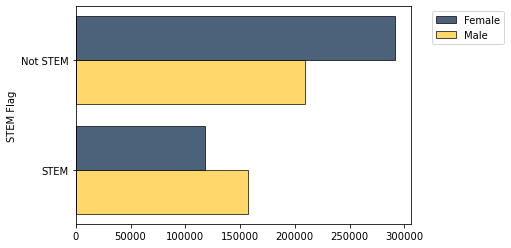

In [45]:
gender_STEM.barh("STEM Flag") # note the interesting bar graph colors...

Looks like our initial alternative hypothesis seems to be true: females are underrepresented in STEM majors. (In "real life", we would have to do some more analysis). We call this "rejecting the null".

# 4. Next Steps

---

Developed by Catherine Gee, <>. 

Materials and content adapted from [*Computational and Inferential Thinking*](https://www.inferentialthinking.com/chapters/intro.html) by Ani Adihikari and John Denero; [*Principles and Techniques of Data Science*](https://www.textbook.ds100.org/intro.html) by Sam Lau, Joey Gonzalez, and Deb Nolan. 